## Objetivo: Classificar a chance de ocorrer um assalto de acordo com a localização, mês, dia do mês e dia da semana.

## 1- Importando a base de dados

In [1]:
#  Importando as bibliotecas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
from datetime import date

In [2]:
url = 'https://raw.githubusercontent.com/robertferro/delitos_NY_2020/master/1%20-%20Manipula%C3%A7%C3%A3o%20de%20dados/dados_processados.csv'

In [3]:
df = pd.read_csv(url)

In [4]:
df.head()

,data_da_ocorrencia,descricao_da_ofensa,nivel_da_ofensa,bairro,idade_do_infrator,sexo_do_infrator,raca_do_infrator,latitude,longitude,ano,dia,mes,dia_da_semana,grave,fds,assalto
0,2020-12-25,FELONY ASSAULT,crime,Bronx,25-44,M,BLACK,40.808798,-73.916184,2020,25,12,Friday,1,0,1
1,2020-12-22,ROBBERY,crime,Manhattan,18-24,M,BLACK HISPANIC,40.845956,-73.937813,2020,22,12,Tuesday,1,0,1
2,2020-12-21,FELONY ASSAULT,crime,Queens,25-44,M,BLACK,40.682398,-73.840079,2020,21,12,Monday,1,0,1
3,2020-12-10,FELONY ASSAULT,crime,Queens,18-24,M,BLACK,40.689336,-73.800409,2020,10,12,Thursday,1,0,1
4,2020-12-09,FORGERY,crime,Staten_Island,18-24,M,BLACK,40.634708,-74.124241,2020,9,12,Wednesday,1,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138987 entries, 0 to 138986
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   data_da_ocorrencia   138987 non-null  object 
 1   descricao_da_ofensa  138987 non-null  object 
 2   nivel_da_ofensa      138987 non-null  object 
 3   bairro               138987 non-null  object 
 4   idade_do_infrator    138987 non-null  object 
 5   sexo_do_infrator     138987 non-null  object 
 6   raca_do_infrator     138987 non-null  object 
 7   latitude             138987 non-null  float64
 8   longitude            138987 non-null  float64
 9   ano                  138987 non-null  int64  
 10  dia                  138987 non-null  int64  
 11  mes                  138987 non-null  int64  
 12  dia_da_semana        138987 non-null  object 
 13  grave                138987 non-null  int64  
 14  fds                  138987 non-null  int64  
 15  assalto          

## 2- Preparaçao dos dados

 - Conventerndo a coluna data_da_ocorrencia para formato datetime

In [6]:
df["data_da_ocorrencia"] = pd.to_datetime(df["data_da_ocorrencia"] )

In [7]:
df.isna().sum()

data_da_ocorrencia     0
descricao_da_ofensa    0
nivel_da_ofensa        0
bairro                 0
idade_do_infrator      0
sexo_do_infrator       0
raca_do_infrator       0
latitude               0
longitude              0
ano                    0
dia                    0
mes                    0
dia_da_semana          0
grave                  0
fds                    0
assalto                0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138987 entries, 0 to 138986
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   data_da_ocorrencia   138987 non-null  datetime64[ns]
 1   descricao_da_ofensa  138987 non-null  object        
 2   nivel_da_ofensa      138987 non-null  object        
 3   bairro               138987 non-null  object        
 4   idade_do_infrator    138987 non-null  object        
 5   sexo_do_infrator     138987 non-null  object        
 6   raca_do_infrator     138987 non-null  object        
 7   latitude             138987 non-null  float64       
 8   longitude            138987 non-null  float64       
 9   ano                  138987 non-null  int64         
 10  dia                  138987 non-null  int64         
 11  mes                  138987 non-null  int64         
 12  dia_da_semana        138987 non-null  object        
 13  grave         

 - Excluindo colunas que não serão utilizadas e renomeando o dataset.

In [9]:
# como todos os registros correspondem ao ano de 2020, a coluna ano será exluída.
dados = df.drop(columns=['ano'])

In [10]:
dados.shape

(138987, 15)

 ## Criando um filtro e pegando apenas os 10 delitos mais praticados

In [11]:
dados.assalto.value_counts()

0    87123
1    51864
Name: assalto, dtype: int64

In [12]:
dados.descricao_da_ofensa.value_counts().head(10)

ASSAULT 3 & RELATED OFFENSES      23731
FELONY ASSAULT                    13475
PETIT LARCENY                     11406
DANGEROUS DRUGS                   11289
MISCELLANEOUS PENAL LAW            9133
ROBBERY                            7948
CRIMINAL MISCHIEF & RELATED OF     7831
DANGEROUS WEAPONS                  6710
GRAND LARCENY                      6542
BURGLARY                           6056
Name: descricao_da_ofensa, dtype: int64

In [13]:
lista_delitos_recorrentes = dict(dados.descricao_da_ofensa.value_counts().head(10))
lista_delitos_recorrentes = list(lista_delitos_recorrentes.keys())

In [14]:
dados = dados.set_index('descricao_da_ofensa')

In [15]:
dados = dados.loc[lista_delitos_recorrentes]

In [16]:
dados.assalto.value_counts()

0    52257
1    51864
Name: assalto, dtype: int64

In [17]:
dados = dados.reset_index()

In [18]:
dados.head()

,descricao_da_ofensa,data_da_ocorrencia,nivel_da_ofensa,bairro,idade_do_infrator,sexo_do_infrator,raca_do_infrator,latitude,longitude,dia,mes,dia_da_semana,grave,fds,assalto
0,ASSAULT 3 & RELATED OFFENSES,2020-10-20,contravencao,Bronx,18-24,M,BLACK,40.822298,-73.911694,20,10,Tuesday,0,0,1
1,ASSAULT 3 & RELATED OFFENSES,2020-10-15,contravencao,Queens,18-24,M,WHITE HISPANIC,40.697730,-73.845596,15,10,Thursday,0,0,1
2,ASSAULT 3 & RELATED OFFENSES,2020-09-30,contravencao,Manhattan,25-44,M,BLACK,40.800846,-73.949030,30,9,Wednesday,0,0,1
3,ASSAULT 3 & RELATED OFFENSES,2020-08-29,contravencao,Bronx,45-64,M,BLACK,40.838551,-73.909399,29,8,Saturday,0,1,1
4,ASSAULT 3 & RELATED OFFENSES,2020-08-09,contravencao,Bronx,45-64,F,BLACK,40.858584,-73.908696,9,8,Sunday,0,1,1


# 3 - Modelagem

## 3.1 Preparação dos Dados
- Separação Treino/Teste
- Separar Dados de Entrada (Atributos) e de saída (target)
- Tratar colunas categóricas
- Tratar dados ausentes


 - Convertendo variáveis categóricas em variáveis numéricas e definindo os dados de entrada e de saída.
 
      - No caso apenas as colunas que serão utilizadas na modelagem serão convertidas.

 - Selecionando apenas as colunas úteis para a modelagem.

In [19]:
dados_ml = dados[['latitude', 'longitude','bairro','dia', 'mes', 'dia_da_semana','fds','assalto']]

In [20]:
dados_ml.head()

,latitude,longitude,bairro,dia,mes,dia_da_semana,fds,assalto
0,40.822298,-73.911694,Bronx,20,10,Tuesday,0,1
1,40.697730,-73.845596,Queens,15,10,Thursday,0,1
2,40.800846,-73.949030,Manhattan,30,9,Wednesday,0,1
3,40.838551,-73.909399,Bronx,29,8,Saturday,1,1
4,40.858584,-73.908696,Bronx,9,8,Sunday,1,1


 - Tratando a coluna dia_da_semana.

In [21]:
dict_dia_da_semana = {'Monday':'segunda','Tuesday':'terca','Wednesday':'quarta','Thursday':'quinta','Friday':'sexta','Saturday':'sabado', 'Sunday':'domingo'}

In [22]:
dados_ml['dia_da_semana'] = dados_ml['dia_da_semana'].map(dict_dia_da_semana)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
dados_ml.head()

,latitude,longitude,bairro,dia,mes,dia_da_semana,fds,assalto
0,40.822298,-73.911694,Bronx,20,10,terca,0,1
1,40.697730,-73.845596,Queens,15,10,quinta,0,1
2,40.800846,-73.949030,Manhattan,30,9,quarta,0,1
3,40.838551,-73.909399,Bronx,29,8,sabado,1,1
4,40.858584,-73.908696,Bronx,9,8,domingo,1,1


- Tratando as colunas categóricas

In [24]:
dados_ml = pd.get_dummies(dados_ml)

In [25]:
dados_ml.head()

,latitude,longitude,dia,mes,fds,assalto,bairro_Bronx,bairro_Brooklyn,bairro_Manhattan,bairro_Queens,bairro_Staten_Island,dia_da_semana_domingo,dia_da_semana_quarta,dia_da_semana_quinta,dia_da_semana_sabado,dia_da_semana_segunda,dia_da_semana_sexta,dia_da_semana_terca
0,40.822298,-73.911694,20,10,0,1,1,0,0,0,0,0,0,0,0,0,0,1
1,40.697730,-73.845596,15,10,0,1,0,0,0,1,0,0,0,1,0,0,0,0
2,40.800846,-73.949030,30,9,0,1,0,0,1,0,0,0,1,0,0,0,0,0
3,40.838551,-73.909399,29,8,1,1,1,0,0,0,0,0,0,0,1,0,0,0
4,40.858584,-73.908696,9,8,1,1,1,0,0,0,0,1,0,0,0,0,0,0


In [26]:
dados_ml.columns

Index(['latitude', 'longitude', 'dia', 'mes', 'fds', 'assalto', 'bairro_Bronx',
       'bairro_Brooklyn', 'bairro_Manhattan', 'bairro_Queens',
       'bairro_Staten_Island', 'dia_da_semana_domingo', 'dia_da_semana_quarta',
       'dia_da_semana_quinta', 'dia_da_semana_sabado', 'dia_da_semana_segunda',
       'dia_da_semana_sexta', 'dia_da_semana_terca'],
      dtype='object')

In [27]:
#  Reordenando as colunas
dados_ml = dados_ml[['latitude', 'longitude', 'dia', 'mes', 'fds', 'assalto', 'bairro_Bronx',
       'bairro_Brooklyn', 'bairro_Manhattan', 'bairro_Queens',
       'bairro_Staten_Island', 'dia_da_semana_segunda','dia_da_semana_terca', 'dia_da_semana_quarta','dia_da_semana_quinta',
        'dia_da_semana_sexta', 'dia_da_semana_sabado', 'dia_da_semana_domingo' ]]

In [28]:
dados_ml.head()

,latitude,longitude,dia,mes,fds,assalto,bairro_Bronx,bairro_Brooklyn,bairro_Manhattan,bairro_Queens,bairro_Staten_Island,dia_da_semana_segunda,dia_da_semana_terca,dia_da_semana_quarta,dia_da_semana_quinta,dia_da_semana_sexta,dia_da_semana_sabado,dia_da_semana_domingo
0,40.822298,-73.911694,20,10,0,1,1,0,0,0,0,0,1,0,0,0,0,0
1,40.697730,-73.845596,15,10,0,1,0,0,0,1,0,0,0,0,1,0,0,0
2,40.800846,-73.949030,30,9,0,1,0,0,1,0,0,0,0,1,0,0,0,0
3,40.838551,-73.909399,29,8,1,1,1,0,0,0,0,0,0,0,0,0,1,0
4,40.858584,-73.908696,9,8,1,1,1,0,0,0,0,0,0,0,0,0,0,1


Separando as variaveis em X e Y

In [29]:
X = dados_ml.drop(columns='assalto',axis=1)
Y = dados_ml['assalto']


Separando em amostras de treino e teste

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_treino,X_teste,Y_treino,Y_teste = train_test_split(X,Y,test_size=0.20,random_state=123,stratify=Y )

 - Criando um Benchmark

In [32]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_treino, Y_treino)
y_pred = dummy_clf.predict(X_teste)
acuracia = dummy_clf.score(X_teste, Y_teste) * 100

print('A acurácia do dummy mostfrequent foi %.2f%%' % acuracia)

A acurácia do dummy mostfrequent foi 50.19%


Text(33.0, 0.5, 'Real ( 1 ou 0)')

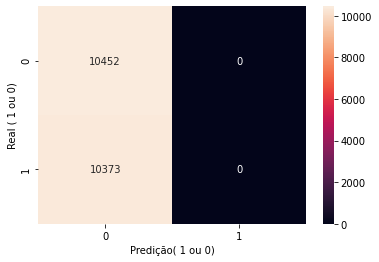

In [33]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(Y_teste, y_pred)
sns.heatmap(cm, annot=True, fmt='g')

plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')

In [34]:
from sklearn.metrics import  roc_auc_score,roc_curve
from sklearn import metrics

y_proba = dummy_clf.predict_proba(X_teste)
roc_auc_score(Y_teste, y_proba[:, 1])

0.5

 - Fazendo uma triagem com outros modelos

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [36]:
lista_classificacores = [ LogisticRegression(),
                         DecisionTreeClassifier(),
                         RandomForestClassifier(),
                         XGBClassifier()]

for clf in lista_classificacores:
  print(clf.__class__.__name__)
  clf.fit(X_treino, Y_treino)

  print('Acuracia')
  train_acc = clf.score(X_treino, Y_treino)
  test_acc = clf.score(X_teste, Y_teste)
  print('Treino:', train_acc)
  print('Teste:', test_acc)

  print('ROC AUC')

  y_proba_treino = clf.predict_proba(X_treino)
  roc_treino = roc_auc_score(Y_treino, y_proba_treino[:, 1])
  print('Treino', roc_treino)

  y_proba_teste = clf.predict_proba(X_teste)
  roc_teste = roc_auc_score(Y_teste, y_proba_teste[:, 1])
  print('Test', roc_teste)
  print('='*80)

LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Acuracia
Treino: 0.5673621782558587
Teste: 0.5653781512605042
ROC AUC
Treino 0.5962515734546392
Test 0.5947295978634514
DecisionTreeClassifier
Acuracia
Treino: 0.9448833077218594
Teste: 0.6521968787515006
ROC AUC
Treino 0.993218698154851
Test 0.6638387707953717
RandomForestClassifier
Acuracia
Treino: 0.9448833077218594
Teste: 0.6630492196878751
ROC AUC
Treino 0.9899021058574122
Test 0.7352608264729787
XGBClassifier
Acuracia
Treino: 0.6026099692662312
Teste: 0.6008163265306122
ROC AUC
Treino 0.6447022224456832
Test 0.6389662433924159


In [37]:
modelo = RandomForestClassifier()

In [38]:
modelo.fit(X_treino, Y_treino)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [39]:
Y_previsto = modelo.predict(X_teste)

 - Gerando a matriz de confusão

Text(33.0, 0.5, 'Real ( 1 ou 0)')

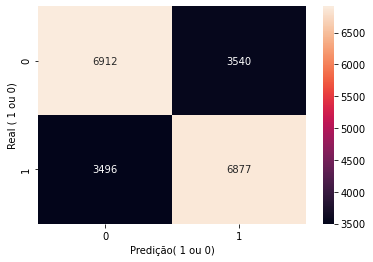

In [40]:
cm=confusion_matrix(Y_teste, Y_previsto)
sns.heatmap(cm, annot=True, fmt='g')

plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')

In [41]:
y_proba = modelo.predict_proba(X_teste)
roc_auc_score(Y_teste, y_proba[:, 1])

0.7346955728886215

In [42]:
from sklearn.metrics import classification_report
print(classification_report(Y_teste, Y_previsto))

              precision    recall  f1-score   support

           0       0.66      0.66      0.66     10452
           1       0.66      0.66      0.66     10373

    accuracy                           0.66     20825
   macro avg       0.66      0.66      0.66     20825
weighted avg       0.66      0.66      0.66     20825



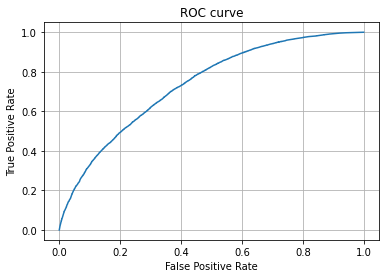

In [43]:
fpr, tpr, thresholds = metrics.roc_curve(Y_teste, y_proba[:,1])
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

## Melhorando o modelo.

In [44]:
Y_previsto[0:15]

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1])

In [45]:
y_proba[0:15]

array([[0.3885    , 0.6115    ],
       [0.56666667, 0.43333333],
       [0.505     , 0.495     ],
       [0.87766667, 0.12233333],
       [0.755     , 0.245     ],
       [0.03166667, 0.96833333],
       [0.96      , 0.04      ],
       [0.25361111, 0.74638889],
       [0.68466667, 0.31533333],
       [0.88      , 0.12      ],
       [0.47297619, 0.52702381],
       [0.55      , 0.45      ],
       [0.05      , 0.95      ],
       [0.39666667, 0.60333333],
       [0.28982143, 0.71017857]])

In [46]:
#  Armazenando as probabilidade de predição para a calsse 1
y_pred_proba = modelo.predict_proba(X_teste)[:,1]

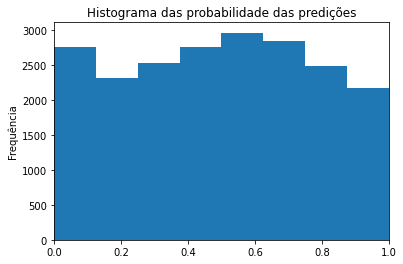

In [47]:
#  histograma das probabilidade de predição

plt.hist(y_pred_proba, bins = 8)
plt.xlim(0,1)
plt.title('Histograma das probabilidade das predições')
plt.ylabel("Frequência")
plt.show()

In [48]:
#  predizendo se a probabilidade for maior que 0.45


from sklearn.preprocessing import binarize
y_pred = binarize([y_pred_proba], 0.37)[0]

Text(33.0, 0.5, 'Real ( 1 ou 0)')

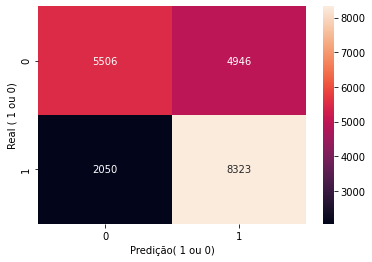

In [49]:
cm=confusion_matrix(Y_teste, y_pred)
sns.heatmap(cm, annot=True, fmt='g')

plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')

In [50]:
roc_auc_score(Y_teste,y_pred)

0.6645803363843598

In [51]:
print(classification_report(Y_teste, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.53      0.61     10452
           1       0.63      0.80      0.70     10373

    accuracy                           0.66     20825
   macro avg       0.68      0.66      0.66     20825
weighted avg       0.68      0.66      0.66     20825



In [52]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics

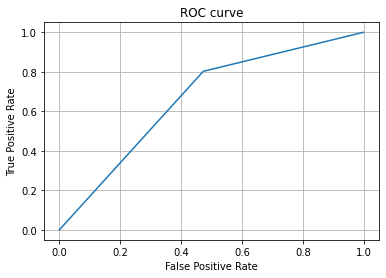

In [53]:
fpr, tpr, thresholds = metrics.roc_curve(Y_teste, y_pred)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()